In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
# Initialising the CNN
model = Sequential()

In [30]:
# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [31]:
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

In [32]:
# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [33]:
#adding 3rd layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [34]:
# Step 3 - Flattening
model.add(Flatten())

In [35]:
# Step 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [36]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
training_set = train_datagen.flow_from_directory(
        'Malaria Cells/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'Malaria Cells/testing_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 27558 images belonging to 2 classes.
Found 15832 images belonging to 2 classes.


In [39]:
# nb_epochs how much times you want to back propogate
# steps_per_epoch it will transfer that many images at 1 time
# & epochs means 'steps_per_epoch' will repeat that many times
model.fit_generator(
        training_set,
        steps_per_epoch=800,
        epochs=10,
        validation_data=test_set,
        validation_steps=400)

Epoch 1/10
800/800 [==============================] - 67s 82ms/step - loss: 0.3383 - accuracy: 0.8447 - val_loss: 0.1618 - val_accuracy: 0.9452
Epoch 2/10
800/800 [==============================] - 66s 83ms/step - loss: 0.1679 - accuracy: 0.9455 - val_loss: 0.1348 - val_accuracy: 0.9536
Epoch 3/10
800/800 [==============================] - 67s 84ms/step - loss: 0.1574 - accuracy: 0.9494 - val_loss: 0.1315 - val_accuracy: 0.9556
Epoch 4/10
800/800 [==============================] - 69s 86ms/step - loss: 0.1482 - accuracy: 0.9514 - val_loss: 0.1264 - val_accuracy: 0.9580
Epoch 5/10
800/800 [==============================] - 71s 89ms/step - loss: 0.1395 - accuracy: 0.9544 - val_loss: 0.1562 - val_accuracy: 0.9516
Epoch 6/10
800/800 [==============================] - 66s 83ms/step - loss: 0.1371 - accuracy: 0.9548 - val_loss: 0.1227 - val_accuracy: 0.9580
Epoch 7/10
800/800 [==============================] - 66s 83ms/step - loss: 0.1345 - accuracy: 0.9540 - val_loss: 0.1262 - val_accuracy:

### Evaluating the Model

In [40]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

<Axes: >

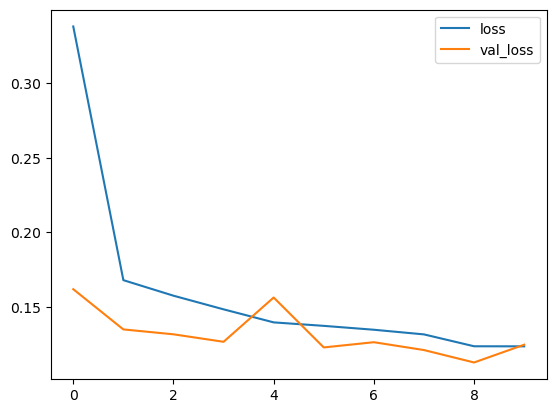

In [41]:
losses[['loss','val_loss']].plot()

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
model.evaluate_generator(test_set)

[0.12412356585264206, 0.9583122730255127]

In [44]:
from tensorflow.keras.preprocessing import image

In [45]:
import numpy as np

test_image = image.load_img('Malaria Cells/single_prediction/Parasitised.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Uninfected'
else:
    prediction = 'Parasitised'
prediction

1/1 [==============================] - 0s 93ms/step


'Parasitised'